In [28]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
import matplotlib.pyplot as plt
from util import *
from loss import *
from Estimator import *

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


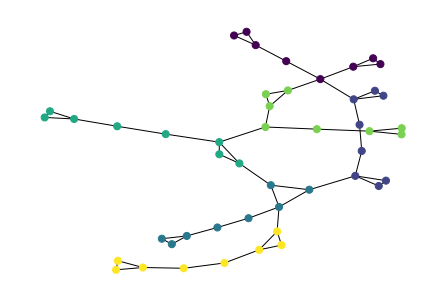

In [45]:
list_shapes = ['nx.barbell_graph'] * 6
list_shapes_args = [[3,2]]*6 
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [6, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label', savefig=False, root=None, figname=None)
L, D, Gamma = graph_to_mat(G)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=20, std=1.0, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


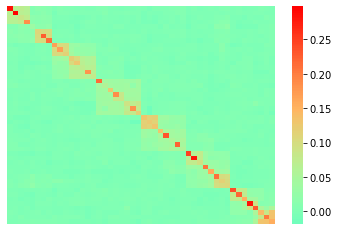

In [52]:
sele = symElastEstimator(l1=10, l2=10, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

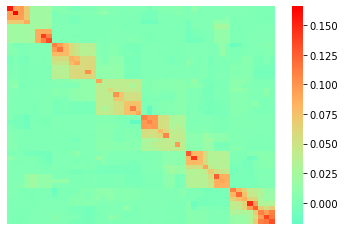

In [54]:
sele = symElastEstimator(l1=10, l2=100, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

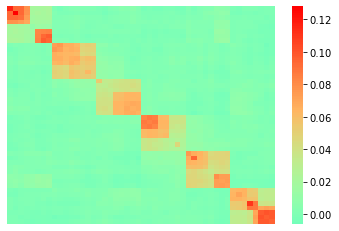

In [121]:
sele = symElastEstimator(l1=50, l2=200, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

In [122]:
W = sele.W.value
W_balanced = np.diag(1/np.sqrt(np.sum(W, axis=1))) @ W @ np.diag(1/np.sqrt(np.sum(W, axis=1))) 

In [135]:
np.sort(np.sum(W_balanced, axis=0))

array([0.64632064, 0.84507057, 0.87848273, 0.91404174, 0.92074473,
       0.93322277, 0.94499199, 0.94689007, 0.9618806 , 0.96575734,
       0.97271869, 0.97375418, 0.97586824, 0.97605124, 0.9769925 ,
       0.97714637, 0.97790491, 0.97825575, 0.97836925, 0.98746218,
       0.99143078, 0.99352317, 0.99406032, 0.99552996, 0.99627783,
       0.99712364, 1.00743348, 1.01149543, 1.01929009, 1.02337771,
       1.02354314, 1.02646277, 1.03166679, 1.03918516, 1.0393659 ,
       1.04078872, 1.04227933, 1.04474494, 1.04918478, 1.04921106,
       1.05551053, 1.05747592, 1.06839309, 1.07177078, 1.07389742,
       1.07604537, 1.07948187, 1.09634636])

<AxesSubplot:>

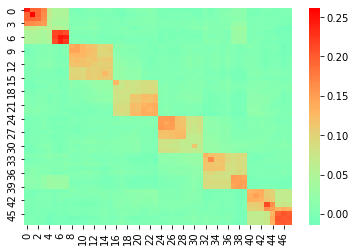

In [124]:
sb.heatmap(W_balanced, cmap='rainbow', center=0)

In [125]:
import numpy as np
import matplotlib.pyplot as plt 

In [126]:
res = np.linalg.svd(W_balanced)

In [ ]:
np.sum(W_balanced, )

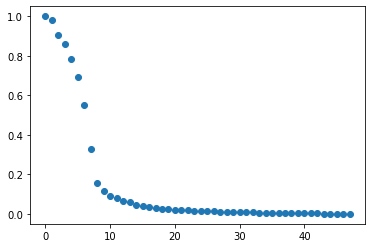

In [127]:
plt.scatter(range(len(res[1])), res[1])

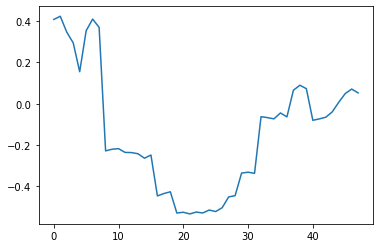

In [128]:
plt.plot(np.sum(res[2][0:5],axis=0))

In [162]:
y=res[2][0]
X = np.array([range(len(y))]).T

In [170]:
from sklearn.tree import DecisionTreeRegressor
clf1 = DecisionTreeRegressor(max_leaf_nodes=8)
clf1.fit(X=X, y=np.array(res[2][0]))
clf2 = DecisionTreeRegressor(max_leaf_nodes=8)
clf2.fit(X=X, y=np.array(res[2][1]))
clf3 = DecisionTreeRegressor(max_leaf_nodes=8)
clf3.fit(X=X, y=np.array(res[2][2]))
clf4 = DecisionTreeRegressor(max_leaf_nodes=8)
clf4.fit(X=X, y=np.array(res[2][3]))
clf5 = DecisionTreeRegressor(max_leaf_nodes=8)
clf5.fit(X=X, y=np.array(res[2][4]))
clf6 = DecisionTreeRegressor(max_leaf_nodes=8)
clf6.fit(X=X, y=np.array(res[2][5]))

DecisionTreeRegressor(max_leaf_nodes=8)

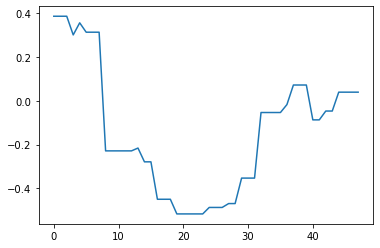

In [171]:
plt.plot(clf1.predict(X) + clf2.predict(X) + clf3.predict(X) + clf4.predict(X) + clf5.predict(X) )

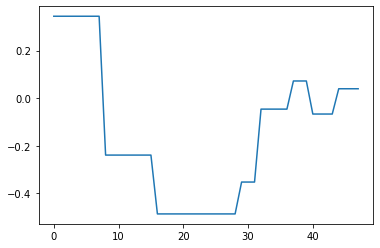

In [172]:
clf = DecisionTreeRegressor(max_leaf_nodes=8)
clf.fit(X=X, y=np.array(clf1.predict(X) + clf2.predict(X) + clf3.predict(X) + clf4.predict(X) + clf5.predict(X)))
plt.plot(clf.predict(X))

In [169]:
clf.predict(X)

array([ 0.34445521,  0.34445521,  0.34445521,  0.34445521,  0.34445521,
        0.34445521,  0.34445521,  0.34445521, -0.22467002, -0.22467002,
       -0.22467002, -0.22467002, -0.22467002, -0.22467002, -0.22467002,
       -0.22467002, -0.48721938, -0.48721938, -0.48721938, -0.48721938,
       -0.48721938, -0.48721938, -0.48721938, -0.48721938, -0.48721938,
       -0.48721938, -0.48721938, -0.48721938, -0.48721938, -0.38579244,
       -0.38579244, -0.38579244, -0.02829475, -0.02829475, -0.02829475,
       -0.02829475, -0.02829475, -0.02829475, -0.02829475, -0.02829475,
       -0.02829475, -0.02829475, -0.02829475, -0.02829475,  0.04882129,
        0.04882129,  0.04882129,  0.04882129])

In [156]:
clf.predict(X)

array([ 0.34445521,  0.34445521,  0.34445521,  0.34445521,  0.34445521,
        0.34445521,  0.34445521,  0.34445521, -0.23625371, -0.23625371,
       -0.23625371, -0.23625371, -0.23625371, -0.23625371, -0.23625371,
       -0.23625371, -0.4904536 , -0.4904536 , -0.4904536 , -0.4904536 ,
       -0.4904536 , -0.4904536 , -0.4904536 , -0.4904536 , -0.4904536 ,
       -0.4904536 , -0.4904536 , -0.4904536 , -0.4904536 , -0.3342718 ,
       -0.3342718 , -0.3342718 , -0.06230959, -0.06230959, -0.06230959,
       -0.06230959, -0.06230959,  0.0757019 ,  0.0757019 ,  0.0757019 ,
       -0.06460311, -0.06460311, -0.06460311, -0.06460311,  0.04468883,
        0.04468883,  0.04468883,  0.04468883])

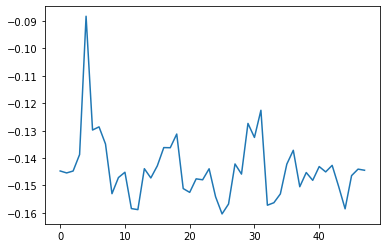

In [129]:
plt.plot(res[2][0])

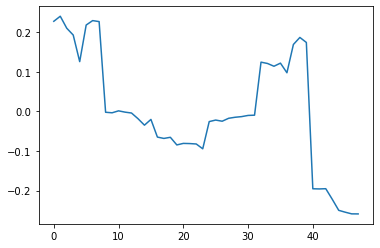

In [130]:
plt.plot(res[2][1])

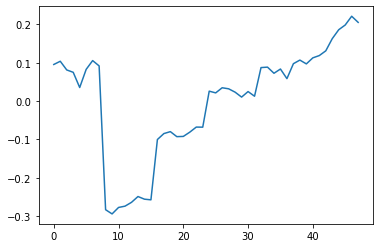

In [131]:
plt.plot(res[2][2])

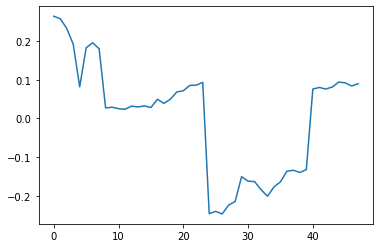

In [132]:
plt.plot(res[2][3])

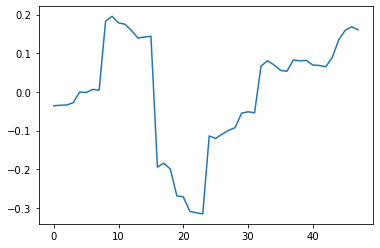

In [133]:
plt.plot(res[2][4])

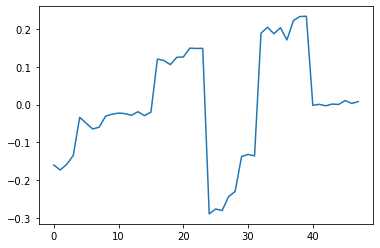

In [134]:
plt.plot(res[2][5])